In [1]:
try:
    from utils import *
except ModuleNotFoundError:
    !wget https://raw.githubusercontent.com/dglee6257/Dataprocessing/main/utils.py -O ./utils.py
    from utils import *

In [2]:
df = read_csv("abalone.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.columns = ["Sex", "Length", "Diam", "Height", "Whole", "Shucked", "Viscera", "Shell", "Rings"]
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("Rings", axis=1)
y = df["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(pred_lr, y_test))

print(f"평균제곱근오차: {rmse:.4f}")

평균제곱근오차: 2.3801


In [7]:
pred_lr.shape

(836,)

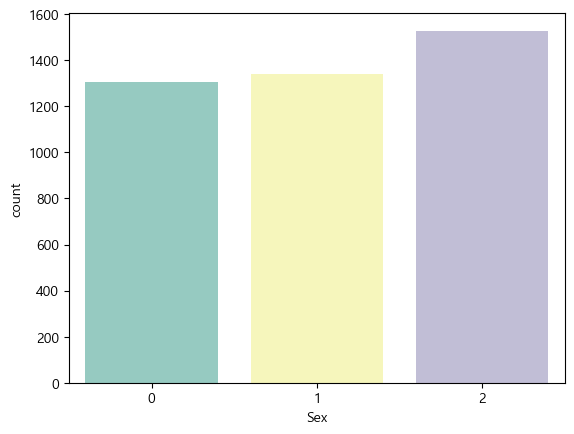

In [8]:
import seaborn as sns

sns.countplot(x="Sex", data=df, palette="Set3");

In [9]:
import matplotlib.pyplot as plt

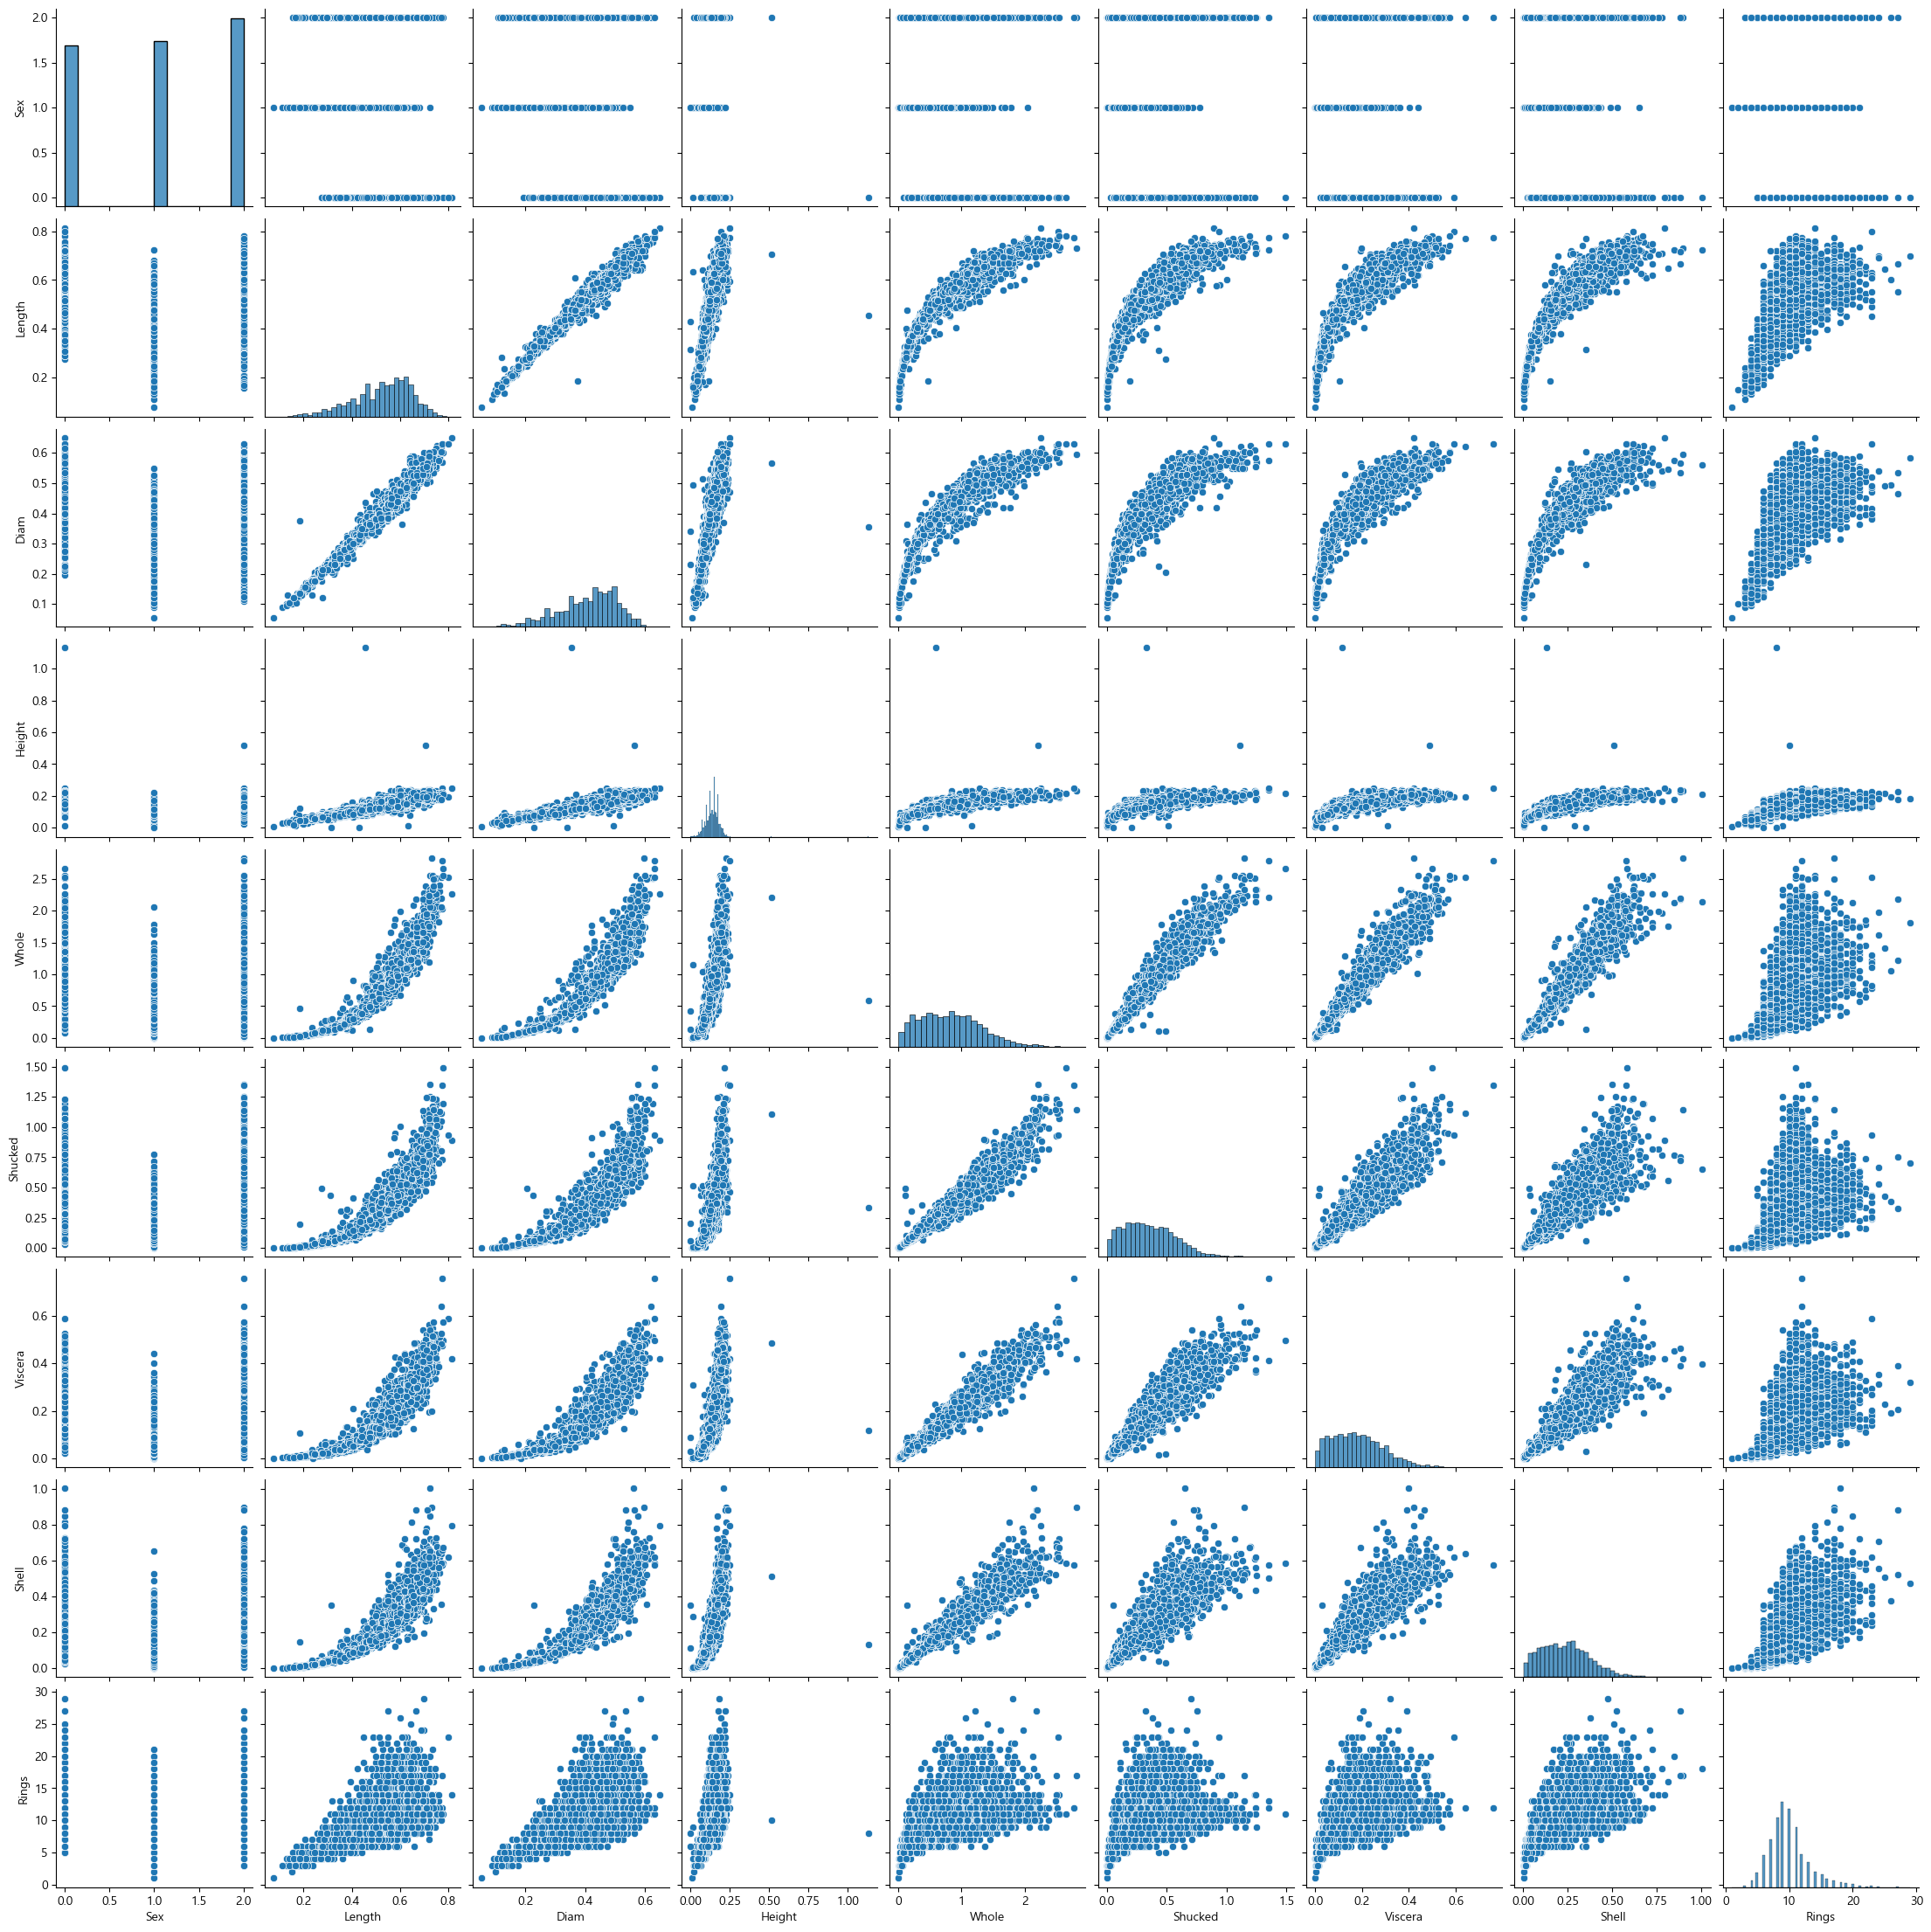

In [10]:
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features]);

In [11]:
df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


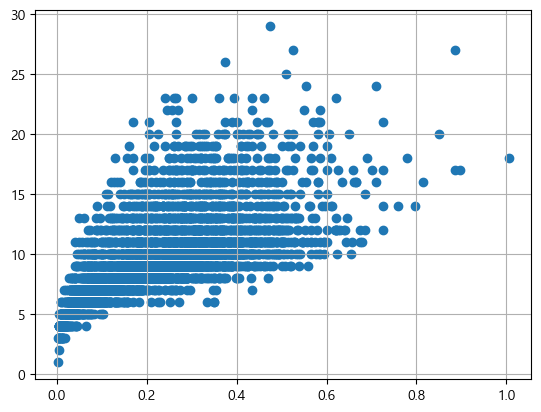

In [12]:
var = 'Shell'
plt.scatter(x=df[var], y=df['Rings'])
plt.grid(True)

In [13]:
cond = (df['Shell'] < 0.8) & (df['Rings'] < 25)
cond


0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

In [14]:
df2 = df[cond]
df2

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
df2["Rings"] = le.fit_transform(df2["Rings"])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df2.drop("Rings", axis=1)
y = df2["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(pred_lr, y_test))

print(f"평균제곱근오차: {rmse:.4f}")

평균제곱근오차: 2.1888


In [17]:
columns = ["Sex", "Length", "Diam", "Height", "Whole", "Shucked", "Viscera", "Shell"]

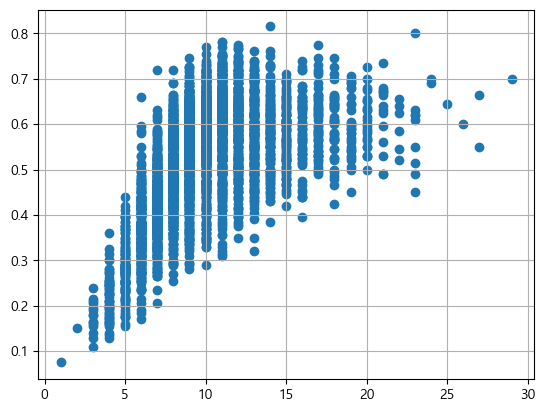

In [18]:
plt.scatter(x=df["Rings"], y=df["Length"])
plt.grid(True)

In [19]:
cond1 = (df["Rings"] < 25) & (df["Length"] < 0.8)
cond1

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

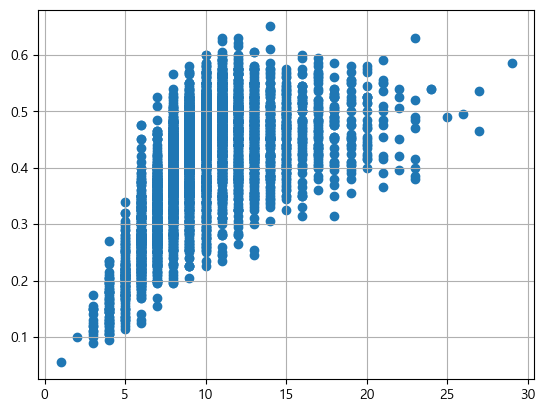

In [20]:
plt.scatter(x=df["Rings"], y=df["Diam"])
plt.grid(True)

In [21]:
cond2 = df["Rings"] < 25
cond2

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Name: Rings, Length: 4177, dtype: bool

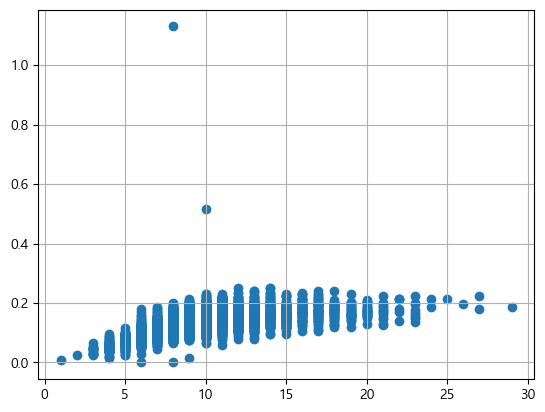

In [22]:
plt.scatter(x=df["Rings"], y=df["Height"])
plt.grid(True)

In [23]:
cond3 = (df["Rings"] < 25) & (df["Height"] < 0.4)
cond3

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

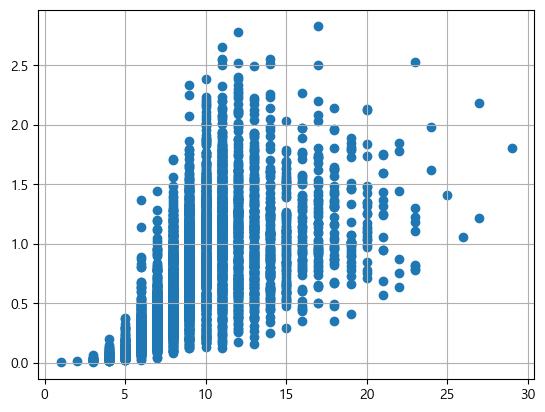

In [24]:
plt.scatter(x=df["Rings"], y=df["Whole"])
plt.grid(True)

In [25]:
cond4 = (df["Rings"] < 25) & (df["Whole"] < 2.5)
cond4

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

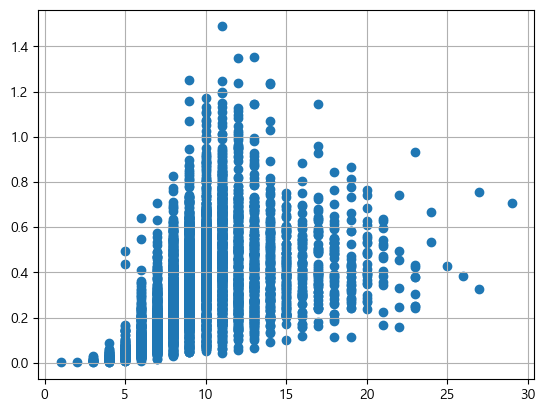

In [26]:
plt.scatter(x=df["Rings"], y=df["Shucked"])
plt.grid(True)

In [27]:
cond5 = (df["Rings"] < 25) & (df["Shucked"] < 1.2)
cond5

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

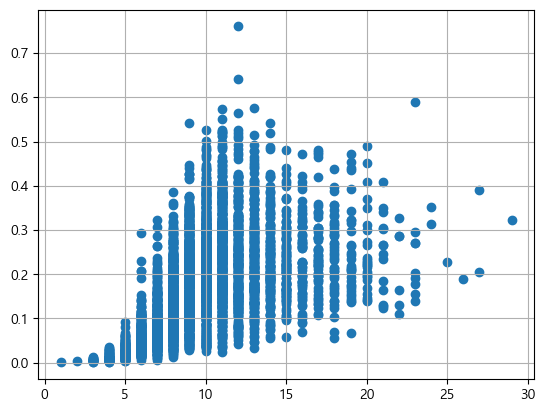

In [28]:
plt.scatter(x=df["Rings"], y=df["Viscera"])
plt.grid(True)

In [29]:
cond6 = (df["Rings"] < 25) & (df["Viscera"] < 0.6)
cond6

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

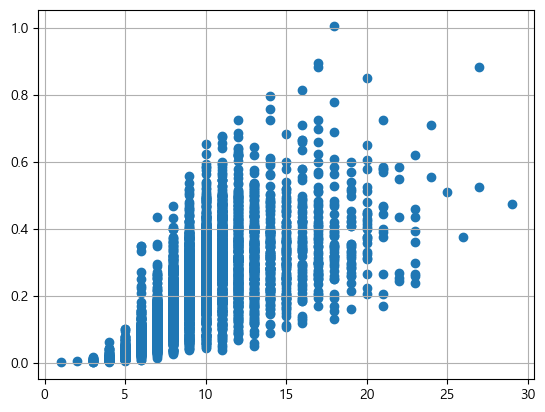

In [30]:
plt.scatter(x=df["Rings"], y=df["Shell"])
plt.grid(True)

In [31]:
cond7 = (df["Rings"] < 25) & (df["Shell"] < 0.8)
cond7

0       True
1       True
2       True
3       True
4       True
        ... 
4172    True
4173    True
4174    True
4175    True
4176    True
Length: 4177, dtype: bool

In [32]:
cond_all = cond1 & cond2 & cond3 & cond4 & cond5 & cond6 & cond7
cond_all.sum()

4150

In [33]:
df2 = df[cond_all]
df2

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df2.drop("Rings", axis=1)
y = df2["Rings"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=423)

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(pred_lr, y_test))

print(f"평균제곱근오차(rmse): {rmse:.4f}")

평균제곱근오차(rmse): 2.1872
